# Итоговая работа

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics

In [2]:
data=pd.read_csv('HR.csv')

In [3]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [8]:
set(data.sales)

{'IT',
 'RandD',
 'accounting',
 'hr',
 'management',
 'marketing',
 'product_mng',
 'sales',
 'support',
 'technical'}

In [9]:
set(data.salary)

{'high', 'low', 'medium'}

## Задание 1.  Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).

In [10]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [11]:
print('Медиана: ', statistics.median(data['satisfaction_level']))

Медиана:  0.64


In [12]:
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [18]:
for c in data.columns:
    print('Медиана для переменной ', c, ' = ', statistics.median(data[c]))

Медиана для переменной  satisfaction_level  =  0.64
Медиана для переменной  last_evaluation  =  0.72
Медиана для переменной  number_project  =  4
Медиана для переменной  average_montly_hours  =  200
Медиана для переменной  time_spend_company  =  3
Медиана для переменной  Work_accident  =  0
Медиана для переменной  left  =  0
Медиана для переменной  promotion_last_5years  =  0
Медиана для переменной  sales  =  sales
Медиана для переменной  salary  =  low


In [20]:
for c in data.columns:
    try:
        print('Мода для переменной ', c, ' = ', statistics.mode(data[c]))
    except: 
        print('Мода для переменной ', c, '  нет уникального значения моды ')
    

Мода для переменной  satisfaction_level  =  0.1
Мода для переменной  last_evaluation  =  0.55
Мода для переменной  number_project  =  4
Мода для переменной  average_montly_hours   нет уникального значения моды 
Мода для переменной  time_spend_company  =  3
Мода для переменной  Work_accident  =  0
Мода для переменной  left  =  0
Мода для переменной  promotion_last_5years  =  0
Мода для переменной  sales  =  sales
Мода для переменной  salary  =  low


## Задание 2. Рассчитать и визуализировать корреляционную матрицу  для переменных.

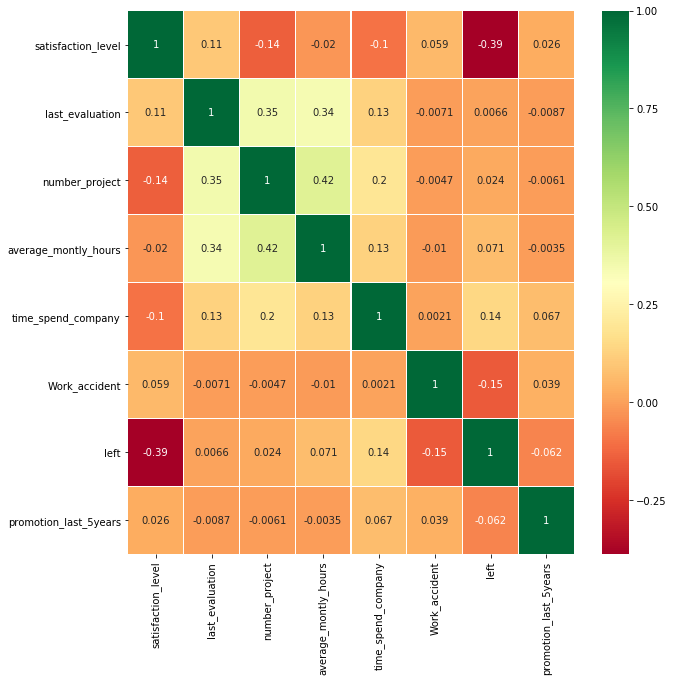

In [22]:
import seaborn as sns
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()

## Задание 3. Визуализировать несколько взаимосвязей между переменными.

В качестве анализируемой переменной, по значению которой представляется логичным разделить выборку, возьмем переменную left. Это позволит изучить влияние остальных переменных на уход сотрудников из компании.

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


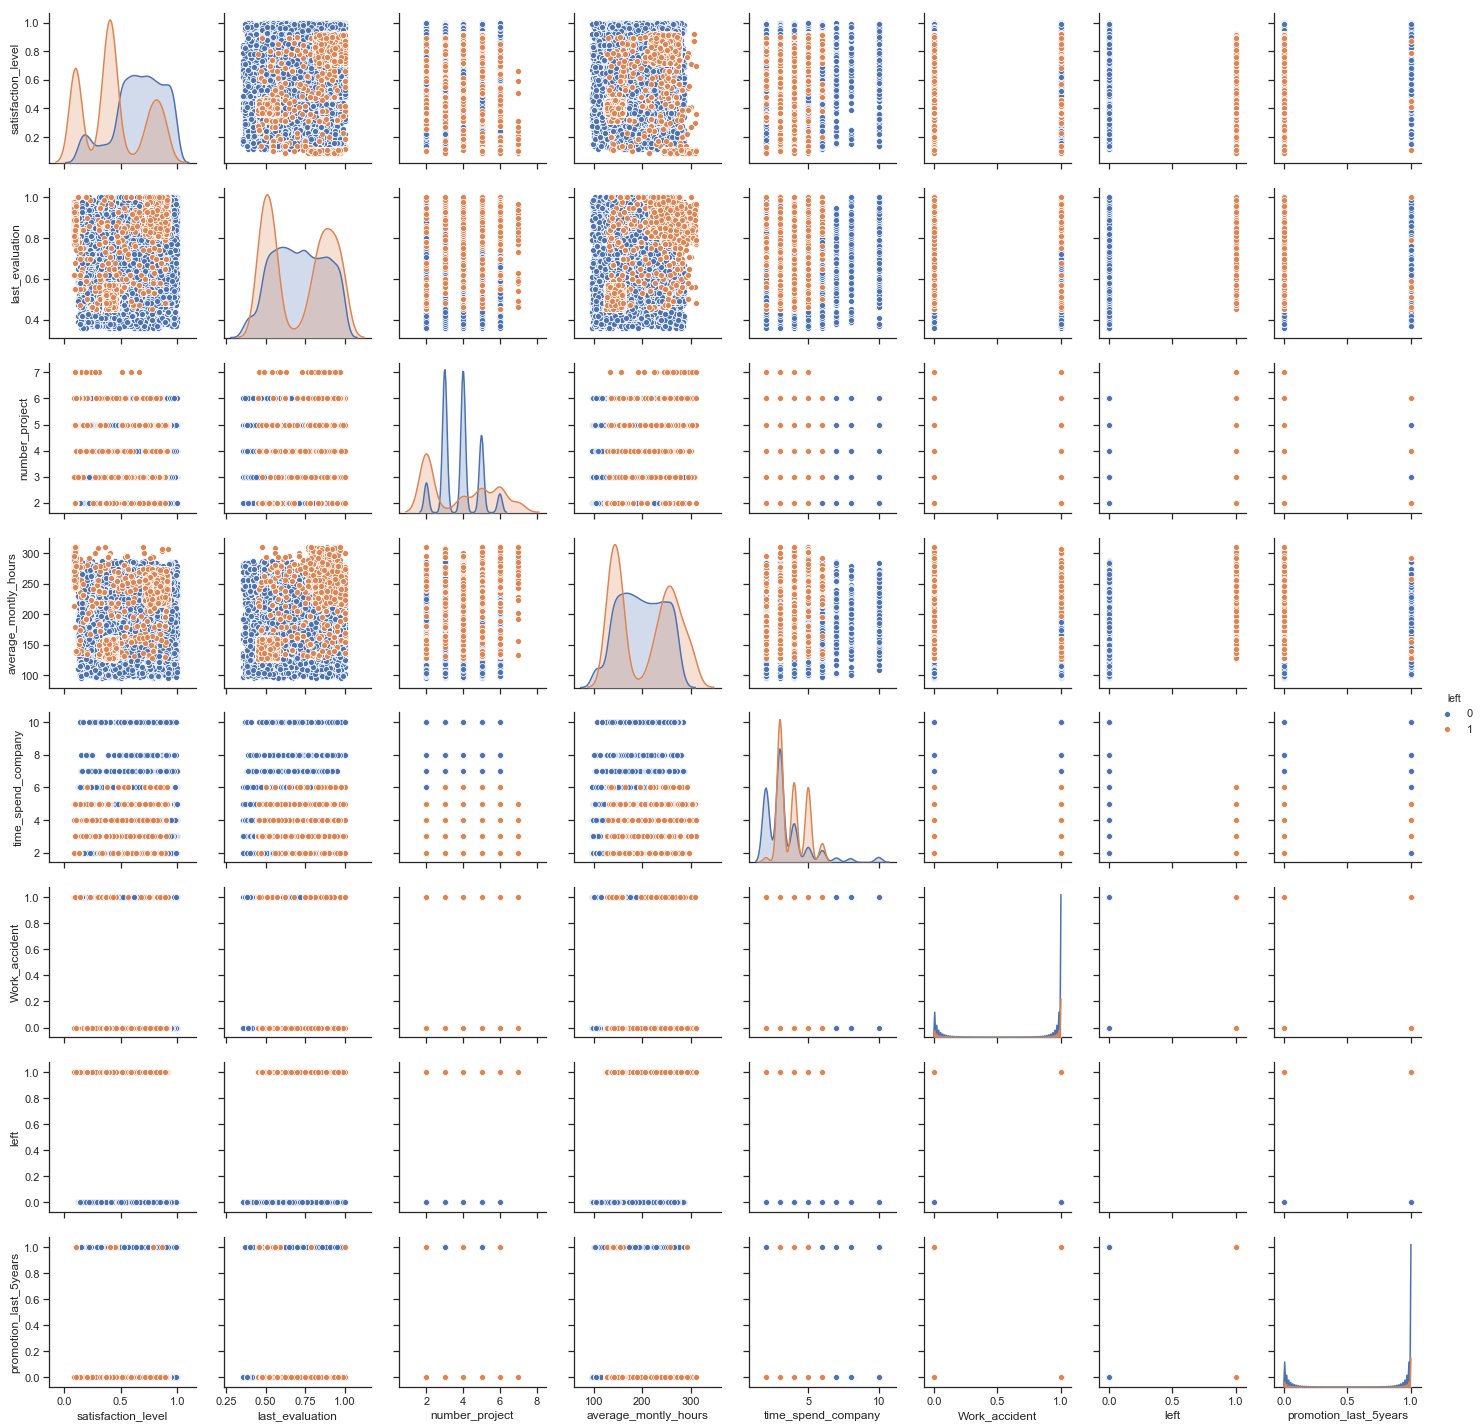

In [26]:
sns.set(style='ticks', color_codes=True)
g = sns.pairplot(data=data, hue='left')

Предварительно можно сделать предположение по итогам анализа попарных графиков, что увольняются те сотрудники, у которых уровень удовлетворенности ниже, чем у тех, кто остается. Также видно, что среди уволившихся количество отработанных часов в месяц либо существенно ниже среднего значения, либо существенно выше среднего.

## Задание 4.С использованием t-test статистики проверить взаимосвязи между несколькими переменными.

### Тестируем нулевую гипотезу о том, что для уволившихся сотрудников и оставшихся сотрудников уровень удовлетворенности совпадает

Средний уровень удовлетворенности для уволившихся сотрудников: 0.44
Средний уровень удовлетворенности для оставшихся сотрудников: 0.67


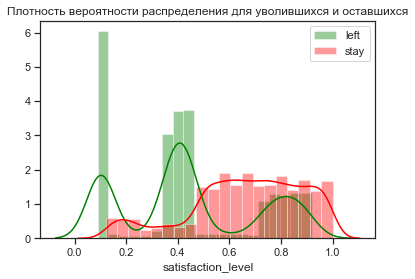

In [47]:
satisfaction_left = data[data['left'] == 1]['satisfaction_level']
satisfaction_stay = data[data['left'] == 0]['satisfaction_level']
print('Средний уровень удовлетворенности для уволившихся сотрудников: %.2f' %satisfaction_left.mean())
print('Средний уровень удовлетворенности для оставшихся сотрудников: %.2f' %satisfaction_stay.mean())
sns.distplot(satisfaction_left, color='green', label='left', bins=20)
sns.distplot(satisfaction_stay, color='red', label='stay', bins=20)
plt.title('Плотность вероятности распределения для уволившихся и оставшихся')
plt.legend()
plt.show()

In [30]:
sts.ttest_ind(satisfaction_left, satisfaction_stay)

Ttest_indResult(statistic=-51.61280155890104, pvalue=0.0)

### Поскольку результат pvalue меньше 0,05, отвергаем нулевую гипотезу о том, что нет различий у групп уволившихся и оставшихся.

### Отметим, что данные не распределены нормально, поэтому используем критерий Уилкоксона

In [34]:
u, p_value = sts.mannwhitneyu(satisfaction_left, satisfaction_stay)
print("two-sample wilcoxon-test", p_value)

two-sample wilcoxon-test 0.0


### Критерий Уилкоксона подтверждает выводы t-теста

### Тестируем нулевую гипотезу о том, что среднее количество отработанных часов для уволившихся и оставшихся совпадает.

Средний уровень отработанных часов для уволившихся сотрудников: 207.42
Средний уровень отработанных часов для оставшихся сотрудников: 199.06


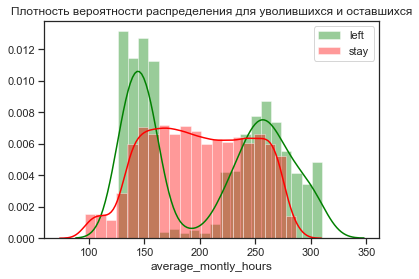

In [51]:
av_month_hours_left = data[data['left'] == 1]['average_montly_hours']
av_month_hours_stay = data[data['left'] == 0]['average_montly_hours']
print('Средний уровень отработанных часов для уволившихся сотрудников: %.2f' %av_month_hours_left.mean())
print('Средний уровень отработанных часов для оставшихся сотрудников: %.2f' %av_month_hours_stay.mean())
sns.distplot(av_month_hours_left, color='green', label='left', bins=20)
sns.distplot(av_month_hours_stay, color='red', label='stay', bins=20)
plt.title('Плотность вероятности распределения для уволившихся и оставшихся')
plt.legend()
plt.show()

In [52]:
sts.ttest_ind(av_month_hours_left, av_month_hours_stay)

Ttest_indResult(statistic=8.752254731850009, pvalue=2.3113035567540143e-18)

### Поскольку результат pvalue меньше 0,05, отвергаем нулевую гипотезу о том, что нет различий у групп уволившихся и оставшихся.

In [53]:
u, p_value = sts.mannwhitneyu(av_month_hours_left, av_month_hours_stay)
print("two-sample wilcoxon-test", p_value)

two-sample wilcoxon-test 6.384782992177166e-09


## Задание 5. Рассчитать сколько работников работает в каждом департаменте.

In [59]:
data.groupby(['sales']).count()['satisfaction_level']

sales
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
Name: satisfaction_level, dtype: int64

## Задание 6. Показать распределение сотрудников по зарплатам.

In [60]:
data['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [62]:
data['salary'].value_counts(normalize=True)

low       0.487766
medium    0.429762
high      0.082472
Name: salary, dtype: float64

## Задание 7. Показать распределение сотрудников по зарплатам совместно с департаментами.

In [69]:
data.groupby(['sales', 'salary']).count()['satisfaction_level']

sales        salary
IT           high        83
             low        609
             medium     535
RandD        high        51
             low        364
             medium     372
accounting   high        74
             low        358
             medium     335
hr           high        45
             low        335
             medium     359
management   high       225
             low        180
             medium     225
marketing    high        80
             low        402
             medium     376
product_mng  high        68
             low        451
             medium     383
sales        high       269
             low       2099
             medium    1772
support      high       141
             low       1146
             medium     942
technical    high       201
             low       1372
             medium    1147
Name: satisfaction_level, dtype: int64

## Задание 8. Сколько сотрудников покинули компанию.

In [79]:
data.groupby(['left']).count()['satisfaction_level']

left
0    11428
1     3571
Name: satisfaction_level, dtype: int64

In [88]:
data[data['left'] == 1]['left'].count()

3571

## Задание 9. Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.

In [107]:
#Количество сотрудников в разрезе категорий зарплат
data.groupby(['salary']).count()['left']

salary
high      1237
low       7316
medium    6446
Name: left, dtype: int64

In [108]:
#Количество уволившихся сотрудников в разрезе категорий зарплат 
data.groupby(['salary']).sum()['left']

salary
high        82
low       2172
medium    1317
Name: left, dtype: int64

In [102]:
#Посмотрим на доли уволившихся сотрудников в разрезе уровней зарплат
data.groupby(['salary']).mean()['left']

salary
high      0.066289
low       0.296884
medium    0.204313
Name: left, dtype: float64

### Протестируем гипотезу о равенстве долей уволившихся сотрудников для двух категорий - low и high. Мы предполагаем (и хотим подтвердить статистически), что сотрудники с низким уровнем оплаты увольняются чаще. Воспользуемся Z-критерием для разности долей:

In [109]:
employee_left_low = data[data['salary'] == 'low']['left']

In [110]:
employee_left_high = data[data['salary'] == 'high']['left']

In [117]:
def proportions_diff_z_test(sample1, sample2):
    n1 = len(sample1)
    n2 = len(sample2)
    
    p1 = float(sum(sample1)) / n1
    p2 = float(sum(sample2)) / n2 
    P = float(p1*n1 + p2*n2) / (n1 + n2)
    
    z_stat = (p1 - p2) / np.sqrt(P * (1 - P) * (1. / n1 + 1. / n2))
    
    return z_stat, 2 * (1 - sts.norm.cdf(np.abs(z_stat)))

In [118]:
z_stat, p_value = proportions_diff_z_test(employee_left_low, employee_left_high)
print('z-stat: ', z_stat)
print('p-value: ', p_value)

z-stat:  17.026148920629755
p-value:  0.0


In [120]:
employee_left_medium = data[data['salary'] == 'medium']['left']

In [121]:
z_stat, p_value = proportions_diff_z_test(employee_left_low, employee_left_medium)
print('z-stat: ', z_stat)
print('p-value: ', p_value)

z-stat:  12.456545561695586
p-value:  0.0


### Таким образом, обе гипотезы о равенстве долей отвергаются на значимом уровне, то есть можно утверждать, что доля уволившихся людей действительно зависит от уровня оплаты труда и по мере роста этого уровня сотрудников увольняется меньше.

### Тестируем нулевую гипотезу о том, что для уволившихся сотрудников и оставшихся сотрудников уровень оценки last_evaluation совпадает

Средний уровень оценки для уволившихся сотрудников: 0.72
Средний уровень оценки для оставшихся сотрудников: 0.72


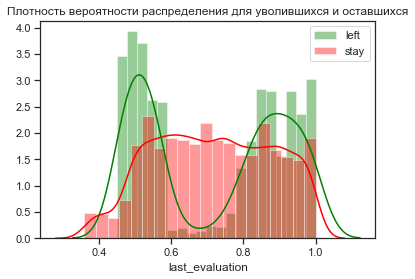

In [122]:
last_evaluation_left = data[data['left'] == 1]['last_evaluation']
last_evaluation_stay = data[data['left'] == 0]['last_evaluation']
print('Средний уровень оценки для уволившихся сотрудников: %.2f' %last_evaluation_left.mean())
print('Средний уровень оценки для оставшихся сотрудников: %.2f' %last_evaluation_stay.mean())
sns.distplot(last_evaluation_left, color='green', label='left', bins=20)
sns.distplot(last_evaluation_stay, color='red', label='stay', bins=20)
plt.title('Плотность вероятности распределения для уволившихся и оставшихся')
plt.legend()
plt.show()

In [123]:
sts.ttest_ind(last_evaluation_left, last_evaluation_stay)

Ttest_indResult(statistic=0.8042416167796329, pvalue=0.4212701963735056)

### Поскольку результат pvalue больше 0,05, принимаем нулевую гипотезу о том, что нет различий у групп уволившихся и оставшихся по критерию оценки. Средний уровень оценки у уволившихся и оставшихся одинаковый и равен 0,72. Иначе говоря, не просматривается очевидной зависимости между уровнем оценки и фактом увольнения. 

### Для более полного анализа причин ухода сотрудников проведем регрессионый анализ и построим логистическую регрессию для оценки влияния каждого фактора на вероятность увольнения сотрудника. В качестве зависимой переменной у будет выступать параметр 'left'. 

In [144]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

### В качестве объясняющих переменных выберем все некатегориальные признаки. Для категориальных признаков можно было бы ввести dummy-переменные, но для упрощения модели исключим их из анализа, поскольку их влияние было частично рассмотрено выше. Для численных переменных применим MinMaxScaler для устранения эффекта масштаба. В качестве классификатора будем использовать логистическую регрессию с параметрами по умолчанию за исключением учета дисбаланса классов (в нашей выборке уволившихся сотрудников существенно меньше, чем оставшихся).

In [145]:
y = data['left']
columns_X = ['satisfaction_level',
         'last_evaluation',
         'number_project',
         'average_montly_hours',
         'time_spend_company',
         'Work_accident',
         'promotion_last_5years']
X = MinMaxScaler().fit_transform(data[columns_X])

C:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [149]:
clf = LogisticRegression(class_weight='balanced').fit(X, y)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [150]:
print('mean accuracy on the given test data and labels: ', clf.score(X, y))

mean accuracy on the given test data and labels:  0.750583372224815


In [151]:
for column, coeff in zip(columns_X, clf.coef_[0]):
    print('coefficient for ', column, ' is: ', coeff)

coefficient for  satisfaction_level  is:  -4.000747935792642
coefficient for  last_evaluation  is:  0.8098839177792037
coefficient for  number_project  is:  -2.0495012143428113
coefficient for  average_montly_hours  is:  1.026672061299884
coefficient for  time_spend_company  is:  3.5195684618244765
coefficient for  Work_accident  is:  -1.5061725097880934
coefficient for  promotion_last_5years  is:  -1.8197364277723684


### Анализ коэффициентов показывает, что наибольшая отрицательная зависимость наблюдается между уровнем удовлетворенности сотрудника и увольнением и количеством проектов и увольнением. Наибольшая положительная зависимость наблюдается между временем, проведенным в компании, и увольнением. 